In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# load the combined dataframe
all = pd.read_pickle("Pickles/fusionv0/all.pkl")

### Ra dec

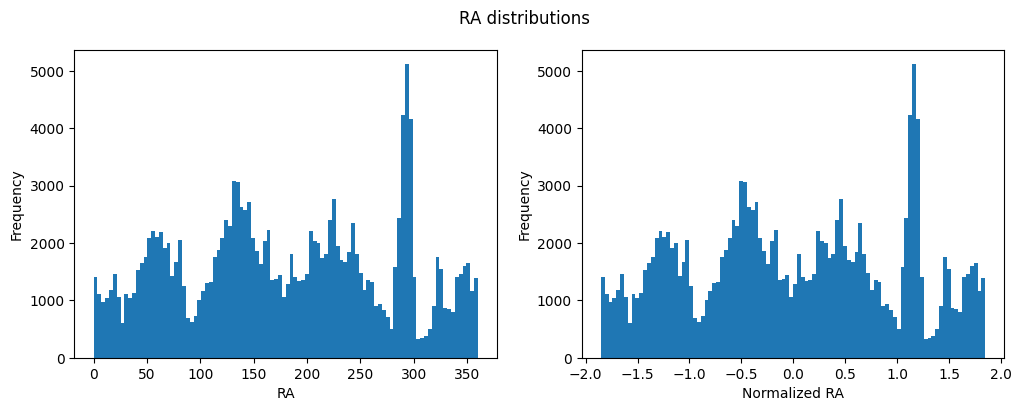

In [18]:
ra = all["ra"]

# plot both the normalized and unnormalized ra distributions subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("RA distributions")
axs[0].hist(ra, bins=100)
axs[0].set_xlabel("RA")
axs[0].set_ylabel("Frequency")
# normalize the ra column
ra = (ra - ra.mean()) / ra.std()
axs[1].hist(ra, bins=100)
axs[1].set_xlabel("Normalized RA")
axs[1].set_ylabel("Frequency")
plt.show()

# save the normalized ra column
all["ra"] = ra


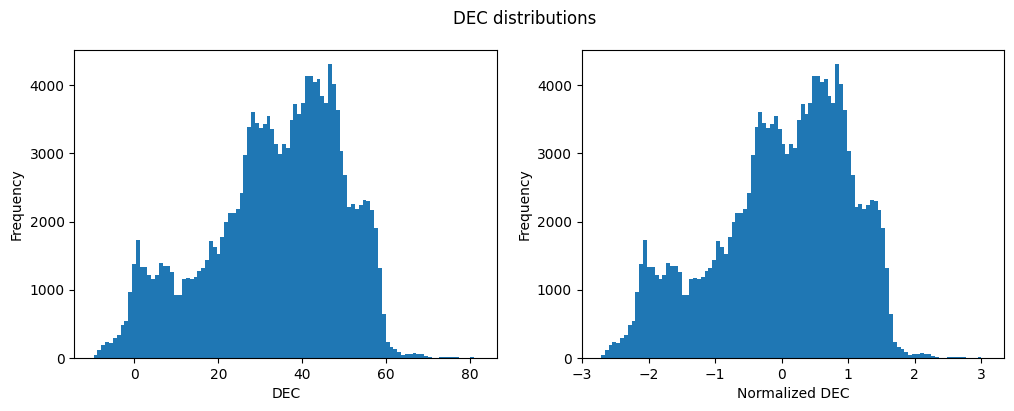

In [21]:
# Same for dec
dec = all["dec"]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("DEC distributions")
axs[0].hist(dec, bins=100)
axs[0].set_xlabel("DEC")
axs[0].set_ylabel("Frequency")
dec = (dec - dec.mean()) / dec.std()
axs[1].hist(dec, bins=100)
axs[1].set_xlabel("Normalized DEC")
axs[1].set_ylabel("Frequency")
plt.show()

all["dec"] = dec


### Ra and dec errors 

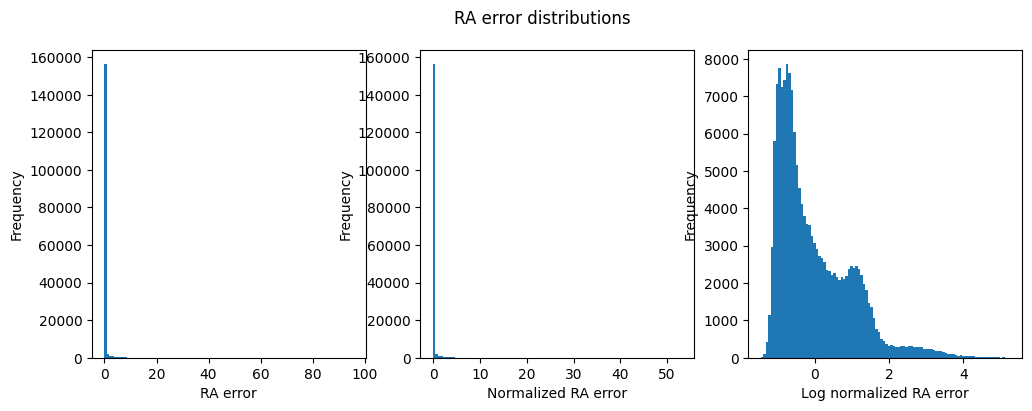

In [27]:
ra_error = all["ra_error"]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("RA error distributions")
axs[0].hist(ra_error, bins=100)
axs[0].set_xlabel("RA error")
axs[0].set_ylabel("Frequency")
# log normalize the ra error column
logg = (np.log(ra_error) - np.log(ra_error).mean()) / np.log(ra_error).std()
axs[2].hist(logg, bins=100)
axs[2].set_xlabel("Log normalized RA error")
axs[2].set_ylabel("Frequency")
ra_error = (ra_error - ra_error.mean()) / ra_error.std()
axs[1].hist(ra_error, bins=100)
axs[1].set_xlabel("Normalized RA error")
axs[1].set_ylabel("Frequency")
plt.show()

all["ra_error"] = logg


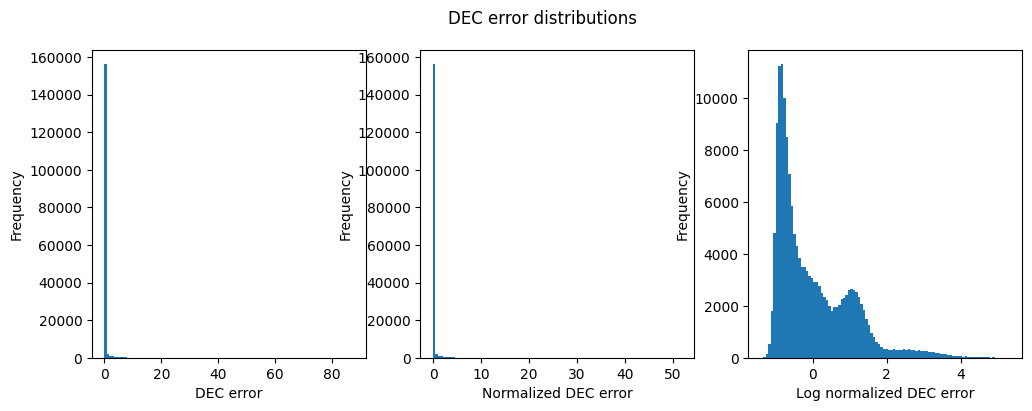

In [29]:
dec_error = all["dec_error"]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("DEC error distributions")
axs[0].hist(dec_error, bins=100)
axs[0].set_xlabel("DEC error")
axs[0].set_ylabel("Frequency")
logg = (np.log(dec_error) - np.log(dec_error).mean()) / np.log(dec_error).std()
axs[2].hist(logg, bins=100)
axs[2].set_xlabel("Log normalized DEC error")
axs[2].set_ylabel("Frequency")
dec_error = (dec_error - dec_error.mean()) / dec_error.std()
axs[1].hist(dec_error, bins=100)
axs[1].set_xlabel("Normalized DEC error")
axs[1].set_ylabel("Frequency")
plt.show()

all["dec_error"] = logg

# Parallax

/home/jcwind/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


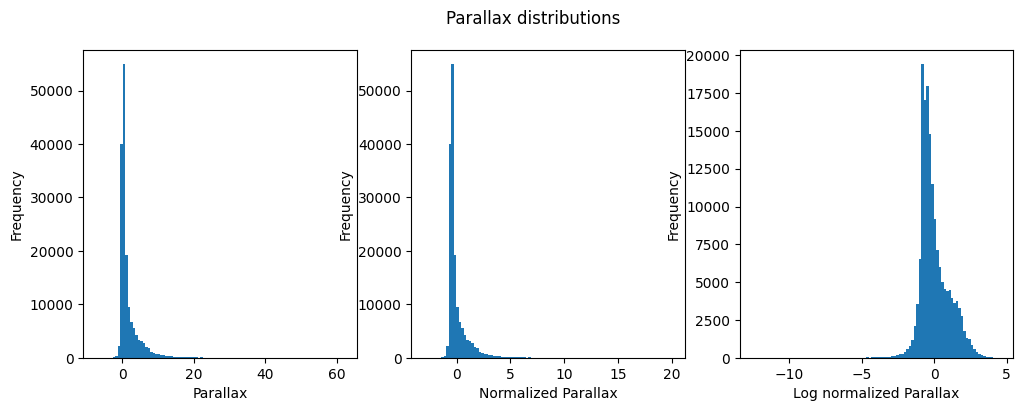

In [34]:
parallax = all["parallax"]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("Parallax distributions")
axs[0].hist(parallax, bins=100)
axs[0].set_xlabel("Parallax")
axs[0].set_ylabel("Frequency")
parallax2 = (parallax - parallax.mean()) / parallax.std()
axs[1].hist(parallax2, bins=100)
axs[1].set_xlabel("Normalized Parallax")
axs[1].set_ylabel("Frequency")
logg = (np.log1p(parallax) - np.log1p(parallax).mean()) / np.log1p(parallax).std()
axs[2].hist(logg, bins=100)
axs[2].set_xlabel("Log normalized Parallax")
axs[2].set_ylabel("Frequency")
plt.show()

all["parallax"] = logg

# Parallax error

/home/jcwind/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


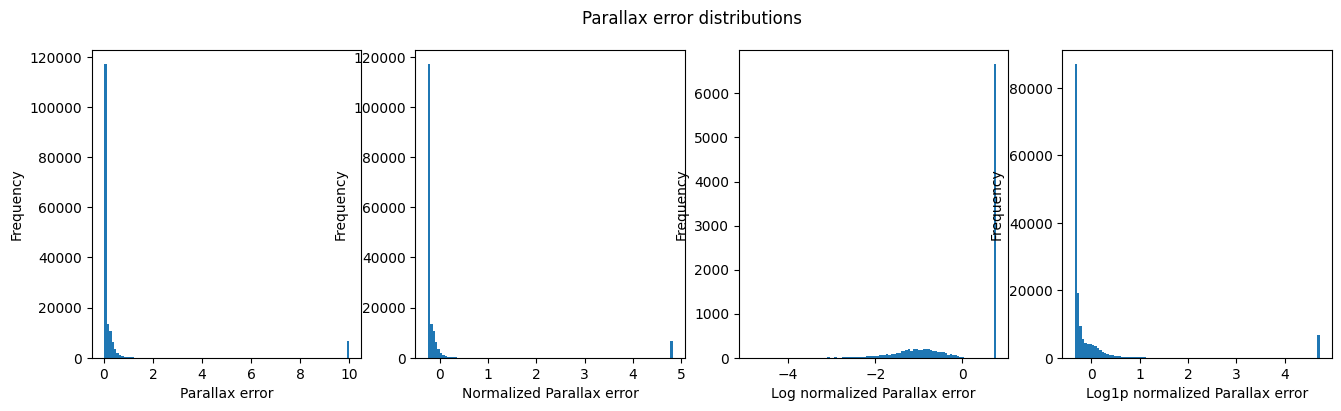

In [40]:
parallax_error = all["parallax_error"]

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle("Parallax error distributions")
axs[0].hist(parallax_error, bins=100)
axs[0].set_xlabel("Parallax error")
axs[0].set_ylabel("Frequency")
parallax_error = (parallax_error - parallax_error.mean()) / parallax_error.std()
axs[1].hist(parallax_error, bins=100)
axs[1].set_xlabel("Normalized Parallax error")
axs[1].set_ylabel("Frequency")
logg = (np.log(parallax_error) - np.log(parallax_error).mean()) / np.log(parallax_error).std()
axs[2].hist(logg, bins=100)
axs[2].set_xlabel("Log normalized Parallax error")
axs[2].set_ylabel("Frequency")
logg1p = (np.log1p(parallax_error) - np.log1p(parallax_error).mean()) / np.log1p(parallax_error).std()
axs[3].hist(logg1p, bins=100)
axs[3].set_xlabel("Log1p normalized Parallax error")
axs[3].set_ylabel("Frequency")
plt.show()

all["parallax_error"] = logg


In [52]:
def plot_alternative_normalizations(all, data_column, title, save=False):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(title + " distributions")
    axs[0].hist(data_column, bins=100)
    axs[0].set_xlabel(title)
    axs[0].set_ylabel("Frequency")
    normalized = (data_column - data_column.mean()) / data_column.std()
    axs[1].hist(normalized, bins=100)
    axs[1].set_xlabel("Normalized")
    axs[1].set_ylabel("Frequency")
    # check if the data is log normalizable, if not, skip the log normalizations
    logg1p = (np.log1p(data_column) - np.log1p(data_column).mean()) / np.log1p(data_column).std()
    axs[3].hist(logg1p, bins=100)
    axs[3].set_xlabel("Log1p normalized " + title)
    axs[3].set_ylabel("Frequency")
    


    if data_column.any() == 0:
        print("Data column contains 0 values, skipping log normalization")
        if save == "log1p":
            all["data_column"] = logg1p
        elif save == "normalized":
            all["data_column"] = normalized
        plt.show()
        return all
    logg = (np.log(data_column) - np.log(data_column).mean()) / np.log(data_column).std()
    
    axs[2].hist(logg, bins=100)
    axs[2].set_xlabel("Log normalized" + title)
    axs[2].set_ylabel("Frequency")
    

    plt.show()

    if save == "log":
        all["data_column"] = logg
    elif save == "log1p":
        all["data_column"] = logg1p
    elif save == "normalized":
        all["data_column"] = normalized
    return all

In [55]:
def plot_alternative_normalizations(all, data_column, title, save=False):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(title + " distributions")
    
    # Original data distribution
    axs[0].hist(data_column.dropna(), bins=100)
    axs[0].set_xlabel(title)
    axs[0].set_ylabel("Frequency")
    
    # Normalized data
    normalized = (data_column - data_column.mean()) / data_column.std()
    axs[1].hist(normalized.dropna(), bins=100)
    axs[1].set_xlabel("Normalized")
    axs[1].set_ylabel("Frequency")
    
    # Log1p normalization (handles zeros)
    logg1p = (np.log1p(data_column) - np.log1p(data_column).mean()) / np.log1p(data_column).std()
    axs[3].hist(logg1p.dropna(), bins=100)
    axs[3].set_xlabel("Log1p normalized " + title)
    axs[3].set_ylabel("Frequency")
    
    # Log normalization (only for positive values)
    positive_data = data_column[data_column > 0]
    if len(positive_data) > 0:
        logg = (np.log(positive_data) - np.log(positive_data).mean()) / np.log(positive_data).std()
        axs[2].hist(logg.dropna(), bins=100)
        axs[2].set_xlabel("Log normalized " + title)
        axs[2].set_ylabel("Frequency")
    else:
        print("No positive values in the data for log normalization.")
    
    plt.show()
    
    # Save the desired transformation
    if save == "log":
        all["data_column"] = logg if len(positive_data) > 0 else all["data_column"]
    elif save == "log1p":
        all["data_column"] = logg1p
    elif save == "normalized":
        all["data_column"] = normalized
        
    return all


## Pmra dec

/home/jcwind/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


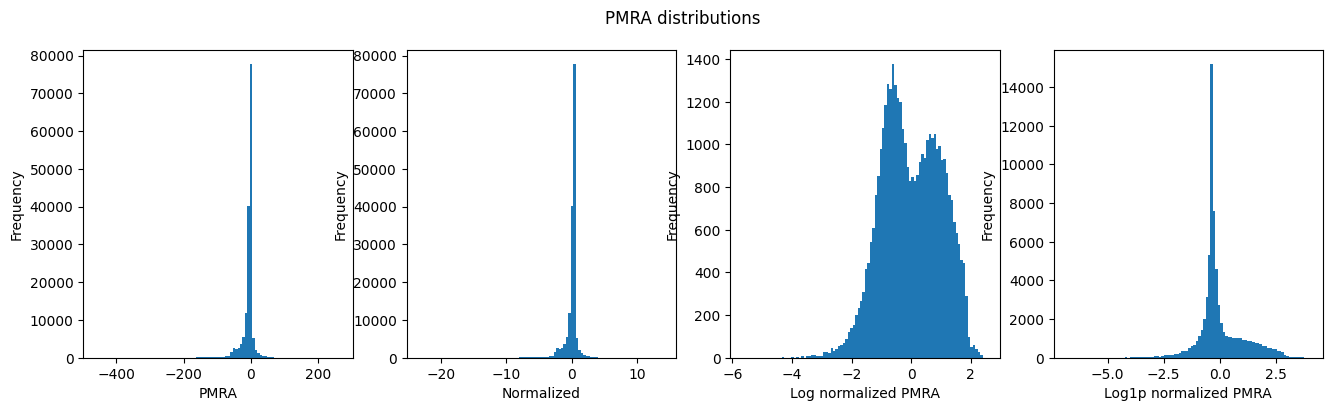

In [56]:
all = plot_alternative_normalizations(all, all["pmdec"], "PMRA")